In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [45]:
fraud= pd.read_csv('C:/Users/krishna/Downloads/Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [82]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variables
df=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [83]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [84]:
# Converting the Sales column into categorical value using mean of the column 7.49
taxable_val = []
for value in df["Taxable.Income"]:
    if value<=30000:
        taxable_val.append("risky")
    else:
        taxable_val.append("good")
df["taxable_val"]= taxable_val

In [85]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxable_val
0,68833,50047,10,0,0,1,1,good
1,33700,134075,18,1,0,0,1,good
2,36925,160205,30,0,1,0,1,good
3,50190,193264,15,1,0,1,1,good
4,81002,27533,28,0,1,0,0,good


In [86]:
X = df.drop(['Taxable.Income','taxable_val'], axis =1)
Y = df['taxable_val'] #Y is our target variable

In [87]:
X

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [88]:
Y

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: taxable_val, Length: 600, dtype: object

In [89]:
df['taxable_val'].unique()

array(['good', 'risky'], dtype=object)

In [90]:
df.taxable_val.value_counts() #how many records in each classes

good     476
risky    124
Name: taxable_val, dtype: int64

In [91]:
# Splitting data into training and testing data set # took 20% of data as test and 80% train
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [92]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2) #max depth means how many layers in tree we want,here wetook 5
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [93]:
pred = model.predict(x_test)
print('Test data Accuracy is:',np.mean(pred==y_test))
pred1 = model.predict(x_train)
print('Train data Accuracy is:',np.mean(pred1==y_train))

Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8


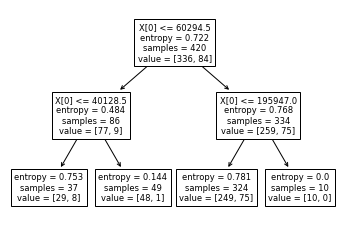

In [94]:
#PLot the decision tree
tree.plot_tree(model);

In [95]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

Text(0.5, 1.0, 'Decision tree using Entropy')

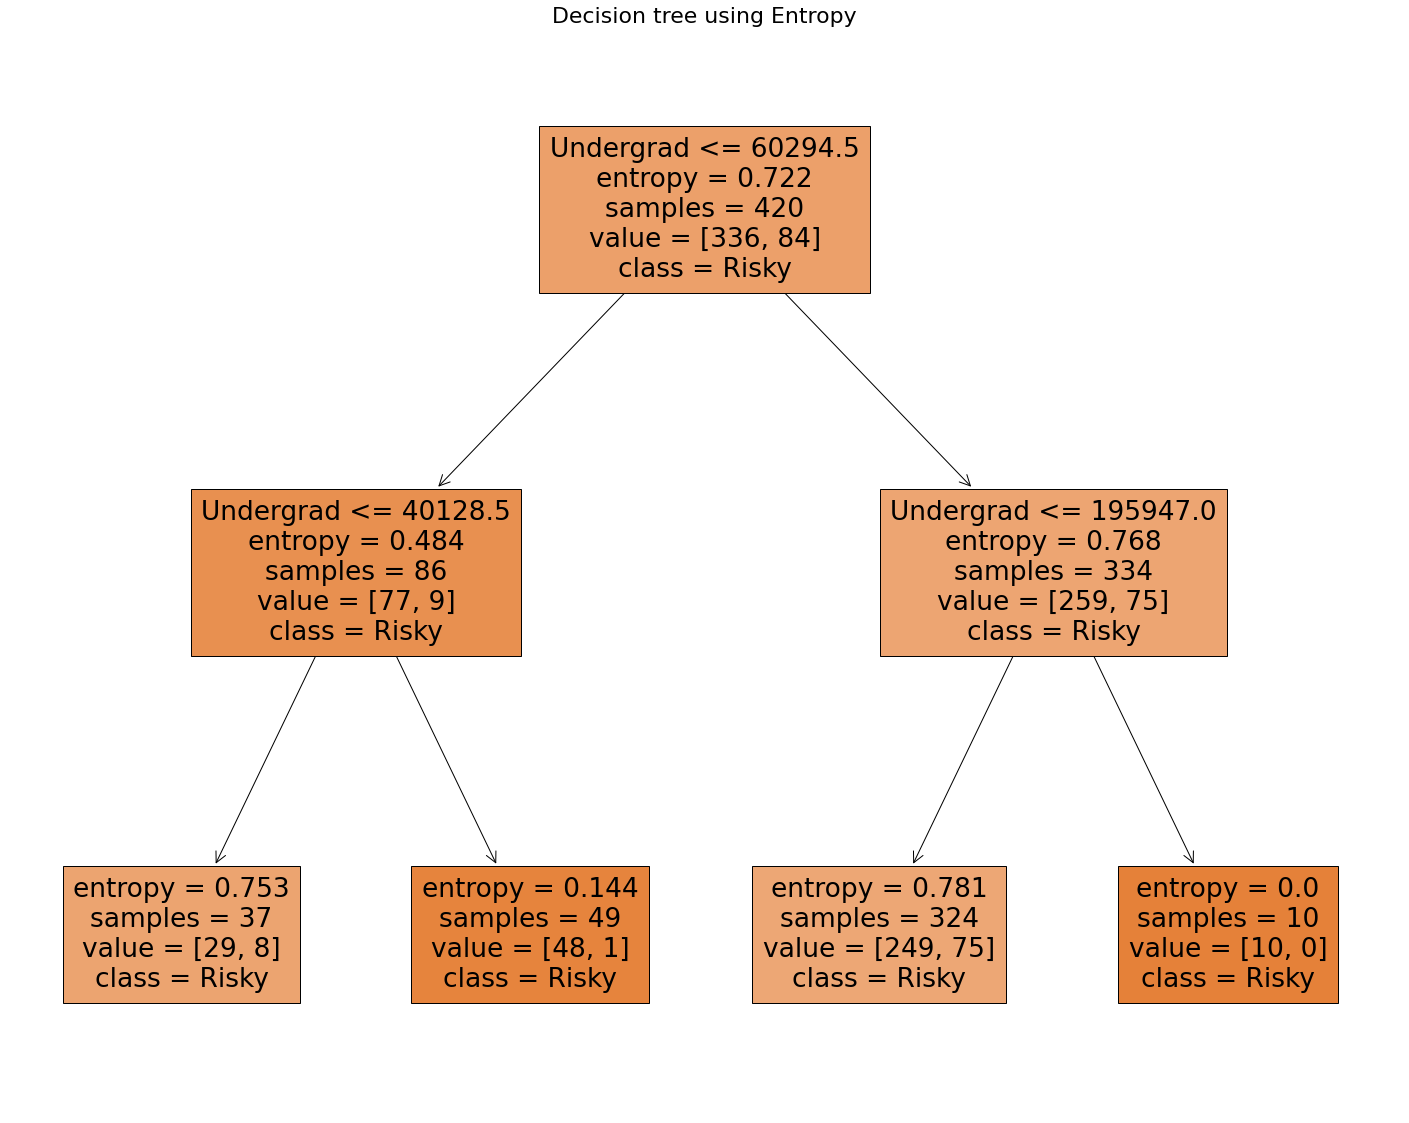

In [96]:
# let's plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
                     feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], 
                     class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [97]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [98]:
pred_testg1 = model_gini.predict(x_test)
print('Test data Accuracy is:',np.mean(pred_testg1==y_test))
#Predicting on train data
pred_traing1 = model_gini.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train))

Test data Accuracy is: 0.7777777777777778
Train data Accuracy is: 0.8


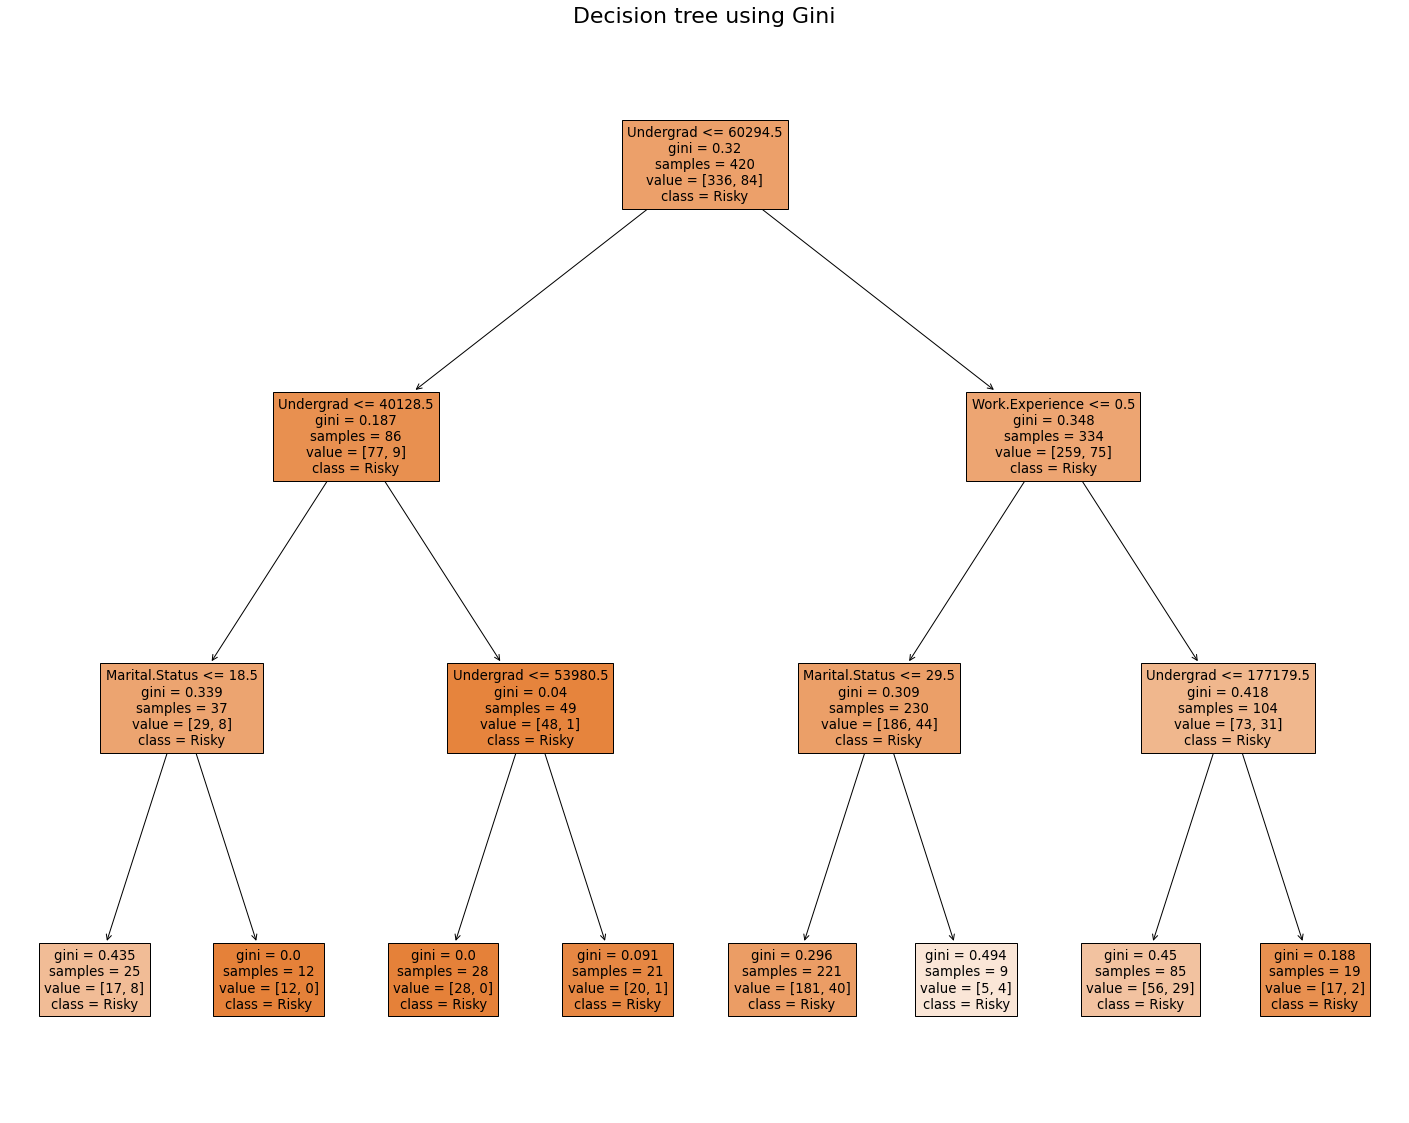

In [99]:
# let's plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], 
                                     class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)
plt.savefig('DT_Gini.pdf')

In [100]:
####From the above decision tree the most important feature affecting the class is Undergrad and both gives best results
#hence from this classification task we can make prediction for new datapoints 